# Mobil Uygulama Yorum Analizi Problem
## İçindekiler
1. [adım adım model reposu oluşturma](#adım-adım-model-reposu-oluşturma)
2. [kütüphaneler ve kurulum](#kütüphaneler-ve-kurulum)
3. [kullanılan veri kümesi amacı](#kullanılan-veri-kümesi-amacı)
## adım adım model reposu oluşturma
---
- Gerekli Kütüphaneleri Yükle
-  İncelemeleri Ön İşlemden Geçirin: Temiz metin, Tokenleştirme ve lemmatizasyon, Durdurma kelimelerini kaldırma, Olumsuz incelemeleri filtreleme
- Word2Vec Modelini Eğitin: Temizlenmiş yorumları Word2Vec modelini eğitmek veya yüklemek için kullanın:
## kullanılan veri kümesi amacı
---
- Google Play incelemelerinden Temu uygulamasının veri kümesi, yaygın kullanıcı şikayetlerini belirlemek ve kategorize etmek için kullanılır. Olumsuz incelemeleri filtreleyerek, anlamsal kümeleme için Word2Vec uygulayarak ve sıkça bahsedilen sorunları çıkararak, veri kümesi temel sorun alanlarını ortaya çıkarmaya yardımcı olur, geliştiricilerin kullanıcı memnuniyetsizliğini anlamalarını ve uygulama iyileştirmelerine öncelik vermelerini sağlar.
## kütüphaneler ve kurulum
---
-  pandas
-  numpy
-  plotly.express
-  textblob
-  matplotlib
-  scikit-learn
-  gensim
-  google-play-scraper

#### Veri kaynağı olarak Google google play scraper kütüphanesini kullanma

In [2]:
import nltk
import pandas as pd 
import numpy as np 
import plotly.express as px
#!pip install google-play-scraper           #ilk kurulum google play scraper kütüphanesini 
from google_play_scraper import app ,reviews

In [4]:
#Temu uygulaması yorumları veri kaynağı olarak kullanıyor ve yalnızca kullanıcılar tarafından yazılmış 50 yorumu seçiyor
temu,_ = reviews('com.einnovation.temu',lang='en',country='TR',count=50)
#temu
#Tabloda 50 yorum görüntüleniyor
dataFrame =pd.json_normalize(temu)
dataFrame.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,4cef2781-41b5-492f-9096-cf084a5db32f,Lisa Fawcett,https://play-lh.googleusercontent.com/a/ACg8oc...,love shopping with Temu. quick and easy to ord...,5,0,None,2025-05-03 19:11:21,None,None,None
1,c32fe94a-d6f5-436c-ab2e-81ea47bd5c5a,Ahad Bhatti,https://play-lh.googleusercontent.com/a-/ALV-U...,Ya doniya ka sab sa gatiya app ha dakta kosh h...,1,0,None,2025-05-03 19:11:06,None,None,None
2,22082449-5911-4f2b-8502-9771a24a186c,Moh Ka,https://play-lh.googleusercontent.com/a/ACg8oc...,lovely,5,0,None,2025-05-03 19:10:29,None,None,None
3,3057d5f4-e468-4d33-8c1c-dc1d82ac4d0f,sharon samuels,https://play-lh.googleusercontent.com/a/ACg8oc...,just such great stuff at cheap prices love it ...,5,0,3.54.0,2025-05-03 19:08:27,None,None,3.54.0
4,4a2876b5-0f42-4b3f-a15c-3e01fb49f582,Brenda,https://play-lh.googleusercontent.com/a/ACg8oc...,lots of choices. be sure to read the entire de...,4,0,3.54.0,2025-05-03 19:08:17,None,None,3.54.0


In [10]:
# yorum içerik sütununu bir listeye dönüştürme
temu_yorumlar =list(dataFrame['content'])
#print(temu_yorumlar)

##### Olumsuz yorumlar filtrelenir.

In [15]:
#!pip install textblob       #ilk kurulum text blod kütüphanesini
from textblob import TextBlob
temu_list_yorumlar=[]

for comment in temu_yorumlar:
    polarity = TextBlob(comment).sentiment.polarity
    if polarity < 0:
        temu_list_yorumlar.append(comment)
        #print("Olumsuz yorum:", comment)
        
#temu_list_yorumlar

#### Ön İşleme (Pre-processing) 

In [20]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Stopwords listesini almak
stop_words = set(stopwords.words('english'))
stop_words_list = list(stop_words)
#print(stop_words_list)

In [26]:
# Kelimeleri tokenleştirip, Sadece harf olan kelimeleri al ve stopword'leri çıkar
filtered_sentences = []
for sentence in temu_list_yorumlar:
    tokens = word_tokenize(sentence) #yorumlar kelimelere böl
    filtered_tokens = [] #bos lıste olustur
    for token in tokens:
        if token.isalpha(): # tokenler metın mı dıye kontrol edıyor(numerık ıse ısleme hıc almıyor)
            token_lower = token.lower() # kucuk harfe cevırme
            if token_lower not in stop_words: # eger kucuk harfe cevrılmıs bu kelımeler stopword lıstesı ıcınden bır kelıme degılse
                filtered_tokens.append(token_lower) #filtered_tokens lıstesıne yukarıdakı krıterlerı saglayan kelımelerı ekle
    filtered_sentences.append(filtered_tokens) #fıltre edılmıs cumlelerı filtered_sentences lıstesıne ekle
#print(filtered_sentences[:10]) #ılk on yorumlar yazdır.

#####  Tüm yorumları lemmatize edip CSV dosyası olarak kaydedeceğim

In [31]:
lemmatizer = WordNetLemmatizer() # Lemmatizeri başlat
tokenized_corpus_lemmatized = [] #lemma edılmıs cumlelerı saklamak ıcın bos bır lıste olustur
for filtered_tokens in filtered_sentences:
    lemmatized_tokens = [] #lemma edılmıs tokenlerı(kelıme) saklamak ıcın bos bır lıste olustur
    for token in filtered_tokens:
        lemma = lemmatizer.lemmatize(token) #Tokenlerı tek tek lemma etme␣ıslemı
        lemmatized_tokens.append(lemma) #Lemma edılmıs tokenlerı lemmatized_tokens lıstesıne ekle
    tokenized_corpus_lemmatized.append(lemmatized_tokens) #Lemma edılmıs yorumlar tokenized_corpus_lemmatized lıstesıne ekle
#print(tokenized_corpus_lemmatized[:10])

In [120]:
import csv
with open("lemmatized_temu_yorumlar.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    # Her yorum bir satır olarak yaz
    for tokens in tokenized_corpus_lemmatized:
        writer.writerow([' '.join(tokens)])

##### Tüm yorumları Stemle edip CSV dosyası olarak kaydedeceğim

In [123]:
stemmer = PorterStemmer() # stemmeri başlat
tokenized_corpus_stemmed = [] #Stem edılmıs yorum saklamak ıcın bos bır lıste olustur
for filtered_tokens in filtered_sentences:
    stemmed_tokens = [] #Stem edılmıs tokenlerı(kelıme) saklamak ıcın bos bır lıste olustur
    for token in filtered_tokens:
        stem = stemmer.stem(token) #Tokenlerı tek tek Stem etme ıslemı
        stemmed_tokens.append(stem) #Stem edılmıs tokenlerı stemmed_tokens lıstesıne ekle
    tokenized_corpus_stemmed.append(stemmed_tokens) #Stem edılmıs yorum tokenized_corpus_stemmed lıstesıne ekle
#print(tokenized_corpus_stemmed[:10])

In [125]:
with open("stemmed_temu_yorumlar.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    # Her yorum bir satır olarak yaz
    for tokens in tokenized_corpus_stemmed:
        writer.writerow([' '.join(tokens)])

#### Zipf yasasi

In [46]:
import matplotlib.pyplot as plt
from nltk.corpus import gutenberg

# Tokenize kelimelere (converting Tokenize list into a list text of words)
word_list = []
for comment in temu_list_yorumlar:
    words = comment.split()  # or use nltk.word_tokenize for better tokenization
    word_list.extend(words)

#print(word_list[:100])

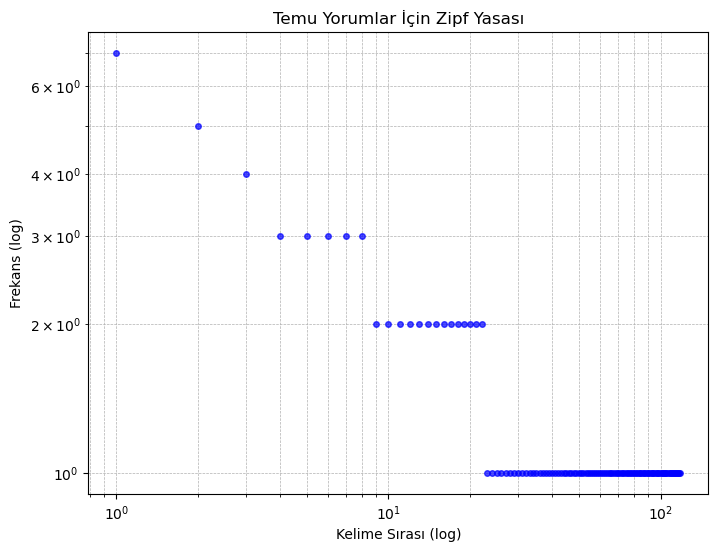

In [48]:
# Kelime frekanslarını hesapla
word_freq = {} # kutuphane kullanmadan
for word in word_list:
    word_freq[word] = word_freq.get(word, 0) + 1
# Frekansları azalan şekilde sırala
sorted_freqs = sorted(word_freq.values(), reverse=True)
# Rank (sıralama) oluştur
ranks = np.arange(1, len(sorted_freqs) + 1)
# Log-log grafiği çiz
plt.figure(figsize=(8, 6))
plt.loglog(ranks, sorted_freqs, marker="o", linestyle="none", markersize=4, alpha=0.7, color="b")
# Grafik etiketleri
plt.xlabel("Kelime Sırası (log)")
plt.ylabel("Frekans (log)")
plt.title("Temu Yorumlar İçin Zipf Yasası")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

In [50]:
print("Toplam kelime (tokens):", len(word_list)) #Toplam kelime
print("Benzersiz kelime (vocab size):", len(set(word_list))) #Benzersiz kelime 

Toplam kelime (tokens): 155
Benzersiz kelime (vocab size): 118


### A. TF-IDF Vektörleştirme
##### Lematize edilmiş veri kümesinin TF-IDF vektörleştirme işlemi.

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
#!pip install scikit-learn

# Ön işlenmiş token listelerini tekrar metne çeviriyoruz
lemmatized_texts = [' '.join(tokens) for tokens in tokenized_corpus_lemmatized]
lemmatized_texts[:10]

['free bol keh ab pesy ki cheez ke cheater cheaper bloody fake',
 'dont deceive people fake free promotion',
 'poor system fake item',
 'bombarded ad cant even use app keep opening random tab keep popping random panel ad gift tab yet none real price also higher platform like shopee lazada like install scam app',
 'fake gift reward',
 'tried cuff bp monitor giving false reading double normal reading made confused worried check bp another monitor find bp lower go hospital check sending monitor back faulty ca trust machine something wrong',
 'fake fraud']

In [55]:
# TF-IDF vektörizerı başlatıyoruz
vectorizer = TfidfVectorizer()
# TF-IDF matrisini oluşturuyoruz
#terim frekansları, belge frekanslarıni hesplar
#TF-IDF vektörlerine dönüştürür
tfidf_matrix = vectorizer.fit_transform(lemmatized_texts)
## Kelimeleri alalım
#F-IDF vektörleştirme işleminde kullanılan tüm kelimelerin essiz bir listesini döndürur
feature_names = vectorizer.get_feature_names_out()
# TF-IDF matrisini pandas DataFrame'e çevir-gorunurluk acisindan- calismasi kolay
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
# İlk birkaç satırı gösterelim-ilk 5 cümle
print(tfidf_df.head())
#Her satır bir yorum temsil eder
#Her sütun bir kelimeyi temsil eder
#Hücreler ise o kelimenin o yorumdeki TF-IDF skorudur - her yorum icin degisir-bakiniz:slaytlar

         ab        ad      also  another       app  back    bloody       bol  \
0  0.301783  0.000000  0.000000      0.0  0.000000   0.0  0.301783  0.301783   
1  0.000000  0.000000  0.000000      0.0  0.000000   0.0  0.000000  0.000000   
2  0.000000  0.000000  0.000000      0.0  0.000000   0.0  0.000000  0.000000   
3  0.000000  0.306106  0.153053      0.0  0.306106   0.0  0.000000  0.000000   
4  0.000000  0.000000  0.000000      0.0  0.000000   0.0  0.000000  0.000000   

   bombarded   bp  ...    shopee  something    system       tab  tried  trust  \
0   0.000000  0.0  ...  0.000000        0.0  0.000000  0.000000    0.0    0.0   
1   0.000000  0.0  ...  0.000000        0.0  0.000000  0.000000    0.0    0.0   
2   0.000000  0.0  ...  0.000000        0.0  0.551219  0.000000    0.0    0.0   
3   0.153053  0.0  ...  0.153053        0.0  0.000000  0.306106    0.0    0.0   
4   0.000000  0.0  ...  0.000000        0.0  0.000000  0.000000    0.0    0.0   

        use  worried  wrong     

In [65]:
# İkinci cümle için TF-IDF skorlarını al
first_comment_vector = tfidf_df.iloc[2]
# Skorlara göre sırala (yüksekten düşüğe)
top_9_words = first_comment_vector.sort_values(ascending=False).head(9)
# Sonucu yazdır
print("İkinci yorum en yüksek TF-IDF skoruna sahip 9 kelime:")
print(top_9_words)

İkinci yorum en yüksek TF-IDF skoruna sahip 9 kelime:
poor        0.551219
item        0.551219
system      0.551219
fake        0.297446
normal      0.000000
platform    0.000000
pesy        0.000000
people      0.000000
panel       0.000000
Name: 2, dtype: float64


In [71]:
from sklearn.metrics.pairwise import cosine_similarity

# fake kelimesinin vektörünü alalım
fake_index = feature_names.tolist().index('fake') # 'fake' kelimesinin indeksini bul
# scam kelimesinin TF-IDF vektörünü alıyoruz ve 2D formatta yapıyoruz
fake_vector = tfidf_matrix[:, fake_index].toarray()
# Tüm kelimelerin TF-IDF vektörlerini alıyoruz
tfidf_vectors = tfidf_matrix.toarray()
# Cosine similarity hesaplayalım
similarities = cosine_similarity(fake_vector.T, tfidf_vectors.T)
# Benzerlikleri sıralayalım ve en yüksek 5 kelimeyi seçelim
similarities = similarities.flatten()
top_5_indices = similarities.argsort()[-6:][::-1] # 6. en büyükten başlıyoruz çünkü kendisi de dahil
# Sonuçları yazdıralım
for index in top_5_indices:
    print(f"{feature_names[index]}: {similarities[index]:.4f}")

fake: 1.0000
fraud: 0.6427
reward: 0.5189
gift: 0.5073
poor: 0.4025
item: 0.4025


In [73]:
# lemmatize edilmiş, temizlenmiş TF-IDF vektörleştirilmiş tema yorumlarını bir csv dosyasına kaydet

# Sonuçları listele
results = [(feature_names[i], round(similarities[i], 4)) for i in top_5_indices]

with open("tfidf_lemmatized.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(['kelime', 'benzerlik'])
    writer.writerows(results)

##### stem edilmiş veri kümesinin TF-IDF vektörleştirme işlemi.

In [76]:
# Ön işlenmiş token listelerini tekrar metne çeviriyoruz
stemmed_texts = [' '.join(tokens) for tokens in tokenized_corpus_stemmed]
stemmed_texts[:10]

['free bol keh ab pesi ki cheez ke cheater cheaper bloodi fake',
 'dont deceiv peopl fake free promot',
 'poor system fake item',
 'bombard ad cant even use app keep open random tab keep pop random panel ad gift tab yet none real price also higher platform like shope lazada like instal scam app',
 'fake gift reward',
 'tri cuff bp monitor give fals read doubl normal read made confus worri check bp anoth monitor find bp lower go hospit check send monitor back faulti ca trust machin someth wrong',
 'fake fraud']

In [78]:
# TF-IDF vektörizerı başlatıyoruz
vectorizer = TfidfVectorizer()
# TF-IDF matrisini oluşturuyoruz
#terim frekansları, belge frekanslarıni hesplar
#TF-IDF vektörlerine dönüştürür
tfidf_matrix = vectorizer.fit_transform(stemmed_texts)
## Kelimeleri alalım
#F-IDF vektörleştirme işleminde kullanılan tüm kelimelerin essiz bir listesini döndürur
feature_names = vectorizer.get_feature_names_out()
# TF-IDF matrisini pandas DataFrame'e çevir-gorunurluk acisindan- calismasi kolay
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
# İlk birkaç satırı gösterelim-ilk 5 cümle
print(tfidf_df.head())
#Her satır bir yorum temsil eder
#Her sütun bir kelimeyi temsil eder
#Hücreler ise o kelimenin o yorumdeki TF-IDF skorudur - her yorum icin degisir-bakiniz:slaytlar

         ab        ad      also  anoth       app  back    bloodi       bol  \
0  0.301783  0.000000  0.000000    0.0  0.000000   0.0  0.301783  0.301783   
1  0.000000  0.000000  0.000000    0.0  0.000000   0.0  0.000000  0.000000   
2  0.000000  0.000000  0.000000    0.0  0.000000   0.0  0.000000  0.000000   
3  0.000000  0.306106  0.153053    0.0  0.306106   0.0  0.000000  0.000000   
4  0.000000  0.000000  0.000000    0.0  0.000000   0.0  0.000000  0.000000   

    bombard   bp  ...     shope  someth    system       tab  tri  trust  \
0  0.000000  0.0  ...  0.000000     0.0  0.000000  0.000000  0.0    0.0   
1  0.000000  0.0  ...  0.000000     0.0  0.000000  0.000000  0.0    0.0   
2  0.000000  0.0  ...  0.000000     0.0  0.551219  0.000000  0.0    0.0   
3  0.153053  0.0  ...  0.153053     0.0  0.000000  0.306106  0.0    0.0   
4  0.000000  0.0  ...  0.000000     0.0  0.000000  0.000000  0.0    0.0   

        use  worri  wrong       yet  
0  0.000000    0.0    0.0  0.000000  
1  0

In [84]:
# İkinci yorum için TF-IDF skorlarını al
first_yorum_vector = tfidf_df.iloc[1]
# Skorlara göre sırala (yüksekten düşüğe)
top_9_words = first_yorum_vector.sort_values(ascending=False).head(9)
# Sonucu yazdır
print("İkinci yorum en yüksek TF-IDF skoruna sahip 9 kelime:")
print(top_9_words)

İkinci yorum en yüksek TF-IDF skoruna sahip 9 kelime:
dont        0.448100
deceiv      0.448100
promot      0.448100
peopl       0.448100
free        0.371962
fake        0.241802
price       0.000000
poor        0.000000
platform    0.000000
Name: 1, dtype: float64


In [86]:
# fake kelimesinin vektörünü alalım
fake_index = feature_names.tolist().index('fake') # 'fake' kelimesinin indeksini bul
# fake kelimesinin TF-IDF vektörünü alıyoruz ve 2D formatta yapıyoruz
fake_vector = tfidf_matrix[:, fake_index].toarray()
# Tüm kelimelerin TF-IDF vektörlerini alıyoruz
tfidf_vectors = tfidf_matrix.toarray()
# Cosine similarity hesaplayalım
similarities = cosine_similarity(fake_vector.T, tfidf_vectors.T)
# Benzerlikleri sıralayalım ve en yüksek 5 kelimeyi seçelim
similarities = similarities.flatten()
top_5_indices = similarities.argsort()[-6:][::-1] # 6. en büyükten başlıyoruz çünkü kendisi de dahil
# Sonuçları yazdıralım
for index in top_5_indices:
    print(f"{feature_names[index]}: {similarities[index]:.4f}")

fake: 1.0000
fraud: 0.6427
reward: 0.5189
gift: 0.5073
poor: 0.4025
item: 0.4025


In [88]:
# steme edilmiş, temizlenmiş TF-IDF vektörleştirilmiş tema yorumlarını bir csv dosyasına kaydet

# Sonuçları listele
results = [(feature_names[i], round(similarities[i], 4)) for i in top_5_indices]

with open("tfidf_stemmed.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(['kelime', 'benzerlik'])
    writer.writerows(results)

### En çok tekrar eden şikayet başlıkları çıkarılır.

In [91]:
from collections import Counter
import itertools
# Tüm belirteçleştirilmiş kelimeleri düzleştir (Flatten all tokenized words)
all_words = list(itertools.chain.from_iterable(tokenized_corpus_lemmatized))

# Count word frequency
word_freq = Counter(all_words)

# Get the most common complaint topics
common_complaints = word_freq.most_common(7)
print("Most common complaint topics:")
for word, freq in common_complaints:
    print(f"{word}: {freq}")

Most common complaint topics:
fake: 5
bp: 3
monitor: 3
free: 2
ad: 2
app: 2
keep: 2


### B. Word2Vec Vektörleştirme

In [94]:
import gensim
from gensim.models import Word2Vec

In [106]:
#tokenized_corpus_lemmatized
#tokenized_corpus_stemmed

# Word2Vec modeli eğitmek için parametreler
parameters = [ {'model_type': 'cbow', 'window': 2, 'vector_size': 100},
 {'model_type': 'skipgram', 'window': 2, 'vector_size': 100},
 {'model_type': 'cbow', 'window': 4, 'vector_size': 100},
 {'model_type': 'skipgram', 'window': 4, 'vector_size': 100},
 {'model_type': 'cbow', 'window': 2, 'vector_size': 300},
 {'model_type': 'skipgram', 'window': 2, 'vector_size': 300},
 {'model_type': 'cbow', 'window': 4, 'vector_size': 300},
 {'model_type': 'skipgram', 'window': 4, 'vector_size': 300}]

# Fonksiyon ile Word2Vec modeli eğitme ve kaydetme
def train_and_save_model(corpus, params, model_name):
    model = Word2Vec(corpus, vector_size=params['vector_size'], window=params['window'], min_count=1, sg=1 if params['model_type'] == 'skipgram' else 0)
    model.save(f"{model_name}_{params['model_type']}_window{params['window']}_dim{params['vector_size']}.model")
    print(f"{model_name}_{params['model_type']}_window{params['window']}_dim{params['vector_size']} model saved!")
# Lemmatize edilmiş corpus ile modelleri eğitme ve kaydetme
for param in parameters:
    train_and_save_model(tokenized_corpus_lemmatized, param, "word2vec_lemmatized")
# Stemlenmiş corpus ile modelleri eğitme ve kaydetme
for param in parameters:
    train_and_save_model(tokenized_corpus_stemmed, param, "stemmed_model")

word2vec_lemmatized_cbow_window2_dim100 model saved!
word2vec_lemmatized_skipgram_window2_dim100 model saved!
word2vec_lemmatized_cbow_window4_dim100 model saved!
word2vec_lemmatized_skipgram_window4_dim100 model saved!
word2vec_lemmatized_cbow_window2_dim300 model saved!
word2vec_lemmatized_skipgram_window2_dim300 model saved!
word2vec_lemmatized_cbow_window4_dim300 model saved!
word2vec_lemmatized_skipgram_window4_dim300 model saved!
stemmed_model_cbow_window2_dim100 model saved!
stemmed_model_skipgram_window2_dim100 model saved!
stemmed_model_cbow_window4_dim100 model saved!
stemmed_model_skipgram_window4_dim100 model saved!
stemmed_model_cbow_window2_dim300 model saved!
stemmed_model_skipgram_window2_dim300 model saved!
stemmed_model_cbow_window4_dim300 model saved!
stemmed_model_skipgram_window4_dim300 model saved!


In [108]:
from gensim.models import Word2Vec

# Model dosyalarını yüklemek
model_1 = Word2Vec.load("lemmatized_model_cbow_window2_dim100.model")
model_2 = Word2Vec.load("stemmed_model_skipgram_window4_dim100.model")
model_3 = Word2Vec.load("lemmatized_model_skipgram_window2_dim300.model")

# 'fake' kelimesi ile en benzer 3 kelimeyi ve skorlarını yazdırmak
def print_similar_words(model, model_name):
    similarity = model.wv.most_similar('fake', topn=3)
    print(f"\n{model_name} Modeli - 'fake' ile En Benzer 3 Kelime:")
    for word, score in similarity:
        print(f"Kelime: {word}, Benzerlik Skoru: {score}")
# 3 model için benzer kelimeleri yazdır
print_similar_words(model_1, "Lemmatized CBOW Window 2 Dim 100")
print_similar_words(model_2, "Stemmed Skipgram Window 4 Dim 100")
print_similar_words(model_3, "Lemmatized Skipgram Window 2 Dim 300")


Lemmatized CBOW Window 2 Dim 100 Modeli - 'fake' ile En Benzer 3 Kelime:
Kelime: popping, Benzerlik Skoru: 0.21889738738536835
Kelime: ad, Benzerlik Skoru: 0.2164149433374405
Kelime: lazada, Benzerlik Skoru: 0.20447270572185516

Stemmed Skipgram Window 4 Dim 100 Modeli - 'fake' ile En Benzer 3 Kelime:
Kelime: pop, Benzerlik Skoru: 0.21942995488643646
Kelime: ad, Benzerlik Skoru: 0.2169867902994156
Kelime: lazada, Benzerlik Skoru: 0.20620104670524597

Lemmatized Skipgram Window 2 Dim 300 Modeli - 'fake' ile En Benzer 3 Kelime:
Kelime: ki, Benzerlik Skoru: 0.19785353541374207
Kelime: false, Benzerlik Skoru: 0.18230026960372925
Kelime: faulty, Benzerlik Skoru: 0.11067494750022888
